# Algoritmo Genético


## Teste de implementação em phyton do Algoritmo Genético Para o problema das 8 rainhas (8-queens)

## Importações

In [1]:
# Manipulação de dados
import numpy as np
#import pandas as pd

# Geração de números aleatórios
import random

In [2]:
#VT = np.array([4,8,2,7,3,1,5,6])
VT = np.array([4,8,2,7,3,7,5,4])

VT

array([4, 8, 2, 7, 3, 7, 5, 4])

## Funções Auxiliares - Problema

### Converte Vetor em Tabuleiro

In [3]:
def converte_tabuleiro(VT):
    '''
    Recebe um vetor representando um tabuleiro
    com N rainhas, uma por coluna e retorna
    uma lista de lista de 0 e 1 representando
    um tabuleiro com as rainhas.
    '''
    N = len(VT)

    L = [0]*N
    T = []
    for i in range(N):
        T += [L.copy()]

    for lin in range(N):
        for col in range(N):
            if lin+1 == VT[col]:
                T[lin][col] = 1

    return T

In [4]:
converte_tabuleiro(VT)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0]]

### Calcula custo (Fitness)

In [5]:
def __conta_ataques_linhas(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas linhas.
    '''
    ataques = 0
    N = len(VT)
    for col1 in range(N):
        lin1 = VT[col1]
        for col2 in range(col1+1, N):
            lin2 = VT[col2]
            if lin1==lin2:
                ataques +=1

    return ataques

In [6]:
__conta_ataques_linhas(VT)

2

In [7]:
def __conta_ataques_diagonais(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas diagonais.
    '''
    ataques = 0
    N = len(VT)

    for col1 in range(N):
        lin1 = VT[col1]
        for col2 in range(col1+1, N):
            lin2 = VT[col2]

            # diferenças entre as linhas e colunas
            d1 = lin1-col1
            d2 = lin2-col2

            # somas das linhas e colunas
            s1 = lin1+col1
            s2 = lin2+col2

            # condições para ataques nas diagonais
            if d1==d2 or s1==s2:
                ataques +=1
                #print(f'({lin1},{col1+1}) ({lin2},{col2+1}) -->', ataques,
                #      '<--', f'  -({d1:2},{d2:2})  +({s1:2},{s2:2})')

    return ataques

In [8]:
converte_tabuleiro(VT)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0]]

In [9]:
__conta_ataques_diagonais(VT)

4

In [10]:
def conta_ataques(VT):
    '''
    Função que recebe um Vetor-Tabuleiro e
    retorna o número de pares de rainhas se
    atacando mutuamente nas linhas e diagonais.
    '''
    ataques  = __conta_ataques_linhas(VT)

    ataques += __conta_ataques_diagonais(VT)

    return ataques

In [11]:
VT = [1,2,3,4,5,6,7,8]

In [12]:
conta_ataques(VT)

28

## Funções Auxiliares - AG

### Gera Indivíduo

In [13]:
def gera_individuo(n_cols):
    # individuo é um Vetor (N) em que cada posicação
    # representa uma coluna indicando as respectivas
    # linhas ocupadas pelas rainhas em um tabuleiro (NxN).

    # VT = [low, high) x n_cols

    VT = np.random.randint(low=1, high=n_cols+1, size=n_cols)
    return VT

In [14]:
N=8
gera_individuo(N)

array([3, 1, 8, 5, 3, 4, 4, 6])

### Gera População

In [15]:
def gera_populacao_inicial(N, tam_pop):
    '''
    Gera uma população inicial de indivíduos.
    
    Parâmetros:
    N (int): Tamanho do tabuleiro (NxN) e número de rainhas.
    tam_pop (int): Tamanho da população (número de indivíduos).
    
    Retorna:
    list: Uma lista contendo os indivíduos gerados.
    '''
    
    populacao = []
    
    for _ in range(tam_pop):
        # Usa a função auxiliar 'gera_individuo' já definida no notebook
        # para criar um novo tabuleiro/indivíduo
        individuo = gera_individuo(N)
        populacao.append(individuo)

    return populacao

In [16]:
N = 8
tam_pop = 20
Populacao = gera_populacao_inicial(N, tam_pop)
Populacao

[array([1, 7, 7, 2, 4, 8, 7, 3]),
 array([5, 8, 3, 1, 6, 6, 2, 2]),
 array([2, 6, 6, 6, 8, 5, 5, 6]),
 array([3, 6, 3, 3, 6, 6, 7, 1]),
 array([3, 5, 6, 3, 7, 8, 7, 7]),
 array([2, 1, 1, 2, 8, 7, 1, 8]),
 array([4, 3, 8, 2, 2, 8, 3, 6]),
 array([2, 3, 1, 8, 5, 3, 8, 1]),
 array([5, 1, 3, 1, 2, 6, 4, 1]),
 array([7, 8, 6, 3, 5, 6, 6, 8]),
 array([8, 6, 5, 1, 1, 7, 1, 8]),
 array([4, 7, 3, 2, 4, 8, 6, 2]),
 array([8, 5, 1, 8, 3, 1, 6, 6]),
 array([8, 8, 6, 8, 5, 5, 7, 5]),
 array([8, 4, 6, 6, 6, 2, 6, 6]),
 array([6, 3, 1, 8, 1, 8, 6, 4]),
 array([8, 6, 8, 2, 5, 6, 1, 3]),
 array([4, 8, 5, 5, 1, 4, 5, 8]),
 array([3, 6, 6, 5, 5, 7, 8, 7]),
 array([8, 6, 3, 2, 4, 2, 6, 6])]

## Algoritmo Genético - Implementação

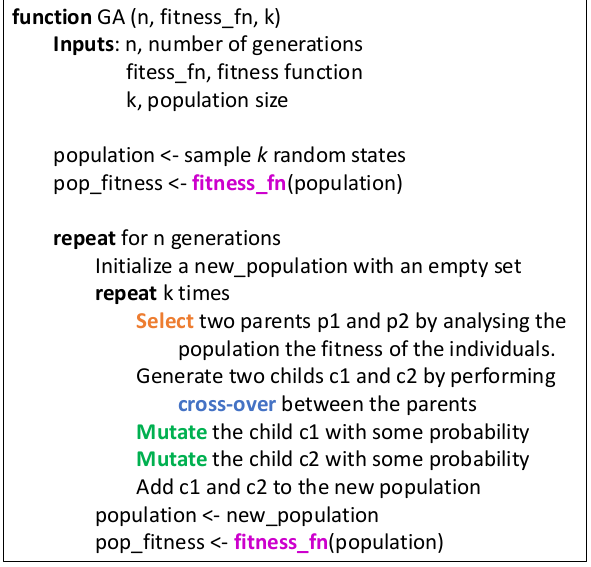


In [17]:
# 1) Randomly initialize populations p
# 2) Compute fitness of population
# 3) Until convergence repeat:
#       a) Select parents from population
#       b) Crossover and generate new population
#       c) Perform mutation on new population with some probability
# 4) Calculate fitness for new population

In [18]:
def algoritmo_genetico(N=8, tam_pop=20, num_geracoes=1000, prob_mutacao=0.2):
    """
    Executa o algoritmo genético para resolver o problema das N-rainhas.
    """
    
    # 1) Inicializa a população
    Populacao = gera_populacao_inicial(N, tam_pop)
    
    melhor_solucao = None
    melhor_custo = float('inf')
    
    # 3) Loop principal (Repetir até convergência ou max gerações)
    for geracao in range(num_geracoes):
        
        # Ordena a população pelo custo (menor custo primeiro)
        Populacao = sorted(Populacao, key=conta_ataques)
        
        # Avalia o melhor da geração atual
        melhor_ind_geracao = Populacao[0]
        custo_geracao = conta_ataques(melhor_ind_geracao)
        
        # Atualiza a melhor solução global encontrada
        if custo_geracao < melhor_custo:
            melhor_solucao = melhor_ind_geracao.copy()
            melhor_custo = custo_geracao
            
        # Critério de parada: solução ótima encontrada (custo 0)
        if melhor_custo == 0:
            print(f"Solução encontrada na geração {geracao}!")
            return melhor_solucao, melhor_custo
            
        # Imprime progresso a cada X gerações (opcional)
        if geracao % 100 == 0:
            print(f"Geração {geracao}: Melhor Custo = {melhor_custo}")
        
        # Nova população
        nova_populacao = []
        
        # Elitismo: Mantém os 2 melhores indivíduos da geração anterior
        nova_populacao.append(Populacao[0])
        nova_populacao.append(Populacao[1])
        
        # Gera o restante da nova população
        while len(nova_populacao) < tam_pop:
            # a) Seleção
            pai1 = selecao(Populacao)
            pai2 = selecao(Populacao)
            
            # b) Crossover
            filho1, filho2 = crossover(pai1, pai2)
            
            # c) Mutação
            mutacao(filho1, prob_mutacao)
            mutacao(filho2, prob_mutacao)
            
            # Adiciona à nova população
            nova_populacao.append(filho1)
            if len(nova_populacao) < tam_pop:
                nova_populacao.append(filho2)
        
        # Atualiza a população para a próxima geração
        Populacao = nova_populacao

    print("Número máximo de gerações atingido.")
    return melhor_solucao, melhor_custo

### Seleciona pais

In [19]:
# SELECAO POR TORNEIO
def selecao(Populacao):
    Candidato1 = random.choice(Populacao)
    Candidato2 = random.choice(Populacao)

    a1 = conta_ataques(Candidato1)
    a2 = conta_ataques(Candidato2)
    #print(a1,a2)

    # eleito o candidato com menor custo
    eleito = Candidato1 if a1<=a2 else Candidato2

    return eleito

In [20]:
#selecao([VT1,VT2])

### Crossover

In [21]:
def crossover(pai1, pai2):
    """
    Aplica o crossover de um ponto entre dois pais para gerar dois filhos.
    """
    n = len(pai1)
    # Escolhe um ponto de corte aleatório entre 1 e N-1
    ponto_corte = random.randint(1, n - 1)
    
    # Cria os filhos combinando partes dos pais
    filho1 = np.concatenate([pai1[:ponto_corte], pai2[ponto_corte:]])
    filho2 = np.concatenate([pai2[:ponto_corte], pai1[ponto_corte:]])
    
    return filho1, filho2


### Mutação

In [22]:
def mutacao(individuo, prob_mutacao=0.1):
    """
    Aplica mutação em um gene do indivíduo com base em uma probabilidade.
    """
    # Verifica se a mutação deve ocorrer
    if random.random() < prob_mutacao:
        n = len(individuo)
        # Escolhe uma coluna aleatória para mutar
        pos = random.randint(0, n - 1)
        # Atribui uma nova linha aleatória (valor entre 1 e N)
        individuo[pos] = random.randint(1, n)
    
    return individuo



In [23]:
# Executar o algoritmo
melhor_tabuleiro, custo = algoritmo_genetico(N=8, tam_pop=50, num_geracoes=2000, prob_mutacao=0.3)

print("\nMelhor Solução Encontrada:", melhor_tabuleiro)
print("Número de Ataques:", custo)

# Visualizar se a solução é válida
if custo == 0:
    print("\nTabuleiro:")
    matriz = converte_tabuleiro(melhor_tabuleiro)
    for linha in matriz:
        print(linha)

Geração 0: Melhor Custo = 3
Solução encontrada na geração 12!

Melhor Solução Encontrada: [6 3 1 8 4 2 7 5]
Número de Ataques: 0

Tabuleiro:
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]


# Atividade – Implementação do Algoritmo Genético para o Problema do TSP



In [24]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time

# Carrega os Dados do Western Sahara (wi29)
WI29_COORDS = """
1 20833.3333 17100.0000
2 20900.0000 17066.6667
3 21300.0000 13016.6667
4 21600.0000 14150.0000
5 21600.0000 14966.6667
6 21600.0000 16500.0000
7 22183.3333 13133.3333
8 22583.3333 14300.0000
9 22683.3333 12716.6667
10 23616.6667 15866.6667
11 23700.0000 15933.3333
12 23883.3333 14533.3333
13 24166.6667 13250.0000
14 25149.1667 12365.8333
15 26133.3333 14500.0000
16 26150.0000 10550.0000
17 26283.3333 12766.6667
18 26433.3333 13433.3333
19 26550.0000 13850.0000
20 26733.3333 11683.3333
21 27026.1111 13051.9444
22 27096.1111 13415.8333
23 27153.6111 13203.3333
24 27166.6667 9833.3333
25 27233.3333 10450.0000
26 27233.3333 11783.3333
27 27266.6667 10383.3333
28 27433.3333 12400.0000
29 27462.5000 12992.2222
"""

def load_data_string(data_str):
    points = []
    for line in data_str.strip().split('\n'):
        parts = line.split()
        points.append([float(parts[1]), float(parts[2])])
    return np.array(points)

cities_coords = load_data_string(WI29_COORDS)
NUM_CITIES = len(cities_coords)

# Matriz de distâncias para otimizar cálculos
def calculate_euclidean_distance(city_a, city_b):
    return np.linalg.norm(city_a - city_b)

def generate_distance_matrix(cities):
    n = len(cities)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i][j] = calculate_euclidean_distance(cities[i], cities[j])
    return dist_matrix

DISTANCE_MATRIX = generate_distance_matrix(cities_coords)

In [25]:
# --- FUNÇÃO DE FITNESS ---
def calculate_fitness(individual):
    """
    Calcula a distância total do trajeto.
    O indivíduo contém apenas a permutação das cidades intermediárias (1 a 28).
    A cidade 0 é fixa no início e fim.
    """
    # Reconstrói o tour completo: 0 -> genes -> 0
    full_tour = [0] + list(individual) + [0]
    
    total_dist = 0
    for i in range(len(full_tour) - 1):
        u, v = full_tour[i], full_tour[i+1]
        total_dist += DISTANCE_MATRIX[u][v]
        
    return total_dist # Queremos minimizar isso

# --- CRIAÇÃO DE INDIVÍDUOS ---
def create_individual():
    """
    Cria um indivíduo como uma permutação aleatória das cidades 1 até N-1.
    A cidade 0 é fixa.
    """
    ind = list(range(1, NUM_CITIES))
    random.shuffle(ind)
    return np.array(ind)

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

# --- SELEÇÃO ---
def tournament_selection(population, fitnesses, k=3):
    """Seleção por torneio: escolhe k indivíduos e retorna o melhor deles."""
    selected_indices = random.sample(range(len(population)), k)
    best_idx = selected_indices[0]
    best_fit = fitnesses[best_idx]
    
    for idx in selected_indices[1:]:
        if fitnesses[idx] < best_fit: # Menor distância é melhor
            best_fit = fitnesses[idx]
            best_idx = idx
            
    return population[best_idx]

# --- CROSSOVER OX (Order Crossover) - OBRIGATÓRIO PELO PDF ---
def crossover_ox(parent1, parent2):
    size = len(parent1)
    
    # Escolhe dois pontos de corte
    cxpoint1, cxpoint2 = sorted(random.sample(range(size), 2))
    
    def apply_ox(p1, p2):
        child = [-1] * size
        # Copia o segmento entre os cortes do pai 1
        child[cxpoint1:cxpoint2+1] = p1[cxpoint1:cxpoint2+1]
        
        # Preenche o resto com genes do pai 2, na ordem que aparecem, começando após o segundo corte
        current_p2_idx = (cxpoint2 + 1) % size
        current_child_idx = (cxpoint2 + 1) % size
        
        while -1 in child:
            gene = p2[current_p2_idx]
            if gene not in child:
                child[current_child_idx] = gene
                current_child_idx = (current_child_idx + 1) % size
            current_p2_idx = (current_p2_idx + 1) % size
            
        return np.array(child)

    child1 = apply_ox(parent1, parent2)
    child2 = apply_ox(parent2, parent1)
    
    return child1, child2

# --- MUTAÇÃO (SWAP) ---
def mutation_swap(individual, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

In [26]:
def genetic_algorithm_tsp(pop_size=100, generations=500, mutation_rate=0.2, elitism=True):
    # 1. Inicializa população
    population = create_population(pop_size)
    
    # Avalia população inicial
    fitnesses = [calculate_fitness(ind) for ind in population]
    
    best_global_cost = min(fitnesses)
    best_global_ind = population[np.argmin(fitnesses)]
    history = [best_global_cost]
    
    for gen in range(generations):
        new_population = []
        
        # Elitismo: mantém o melhor da geração anterior
        if elitism:
            best_idx = np.argmin(fitnesses)
            new_population.append(population[best_idx].copy())
        
        # Gera novos indivíduos até preencher a população
        while len(new_population) < pop_size:
            # Seleção
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            
            # Crossover
            child1, child2 = crossover_ox(parent1, parent2)
            
            # Mutação
            child1 = mutation_swap(child1, mutation_rate)
            child2 = mutation_swap(child2, mutation_rate)
            
            new_population.append(child1)
            if len(new_population) < pop_size:
                new_population.append(child2)
        
        population = new_population
        fitnesses = [calculate_fitness(ind) for ind in population]
        
        # Monitoramento
        current_best_cost = min(fitnesses)
        if current_best_cost < best_global_cost:
            best_global_cost = current_best_cost
            best_global_ind = population[np.argmin(fitnesses)].copy()
            
        history.append(best_global_cost)
        
    return best_global_ind, best_global_cost, history



In [27]:
# --- EXECUÇÃO (20 vezes) ---
N_EXEC = 20
# Parâmetros sugeridos: População ajustada ao problema, Gerações suficientes
POP_SIZE = 100 
GENERATIONS = 1000
MUTATION_RATE = 0.2

ga_costs = []
ga_histories = []
ga_best_tour = None
ga_min_cost = float('inf')

print(f"Iniciando {N_EXEC} execuções do GA...")
start_t = time.time()

for i in range(N_EXEC):
    tour, cost, hist = genetic_algorithm_tsp(POP_SIZE, GENERATIONS, MUTATION_RATE)
    ga_costs.append(cost)
    ga_histories.append(hist)
    
    if cost < ga_min_cost:
        ga_min_cost = cost
        ga_best_tour = tour
        
    if (i+1) % 5 == 0:
        print(f"Execução {i+1}/{N_EXEC}. Melhor custo: {cost:.2f}")

end_t = time.time()
print(f"Tempo total: {end_t - start_t:.2f}s")

# Estatísticas
print("\n=== ESTATÍSTICAS GA (20 Execuções) ===")
print(f"Mínimo: {np.min(ga_costs):.2f}")
print(f"Média: {np.mean(ga_costs):.2f}")
print(f"Desvio Padrão: {np.std(ga_costs):.2f}")

Iniciando 20 execuções do GA...
Execução 5/20. Melhor custo: 32322.27
Execução 10/20. Melhor custo: 35828.73
Execução 15/20. Melhor custo: 31925.75
Execução 20/20. Melhor custo: 28697.84
Tempo total: 48.64s

=== ESTATÍSTICAS GA (20 Execuções) ===
Mínimo: 28697.84
Média: 32553.89
Desvio Padrão: 2351.30


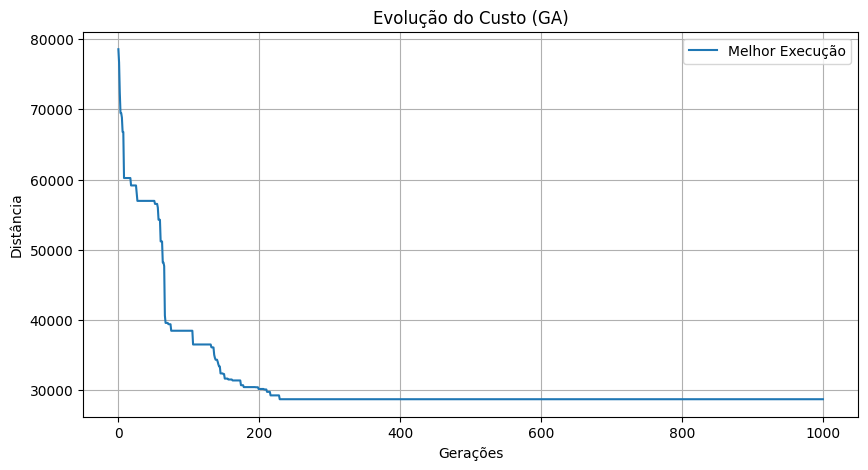

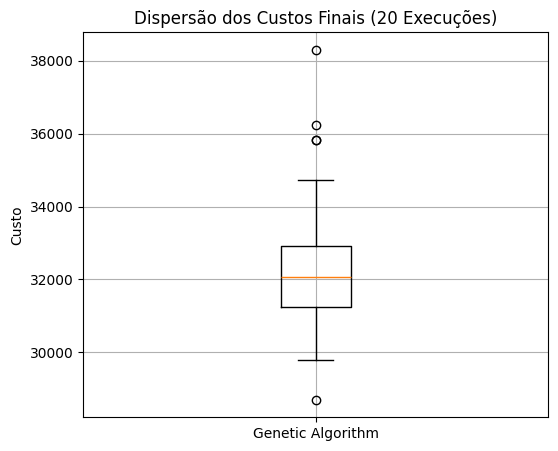

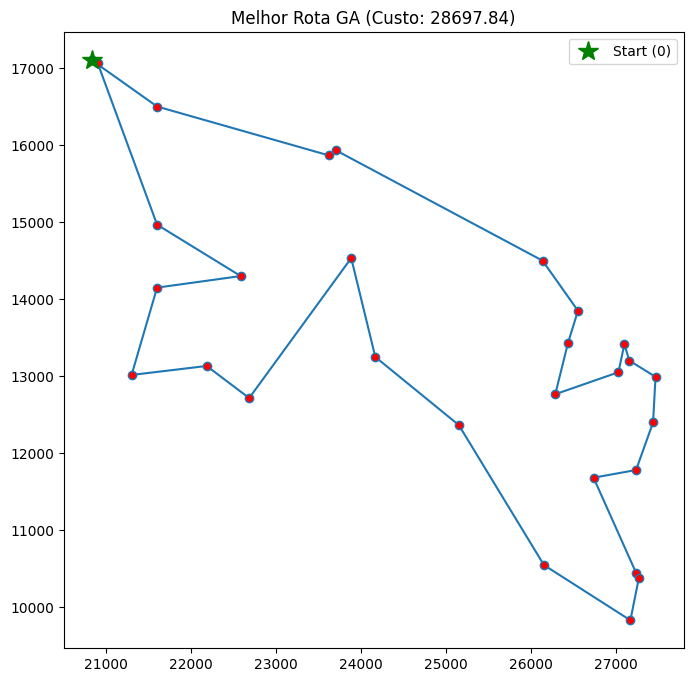

In [29]:
# Gráfico de Convergência (Melhor Execução)
best_run_idx = np.argmin(ga_costs)
plt.figure(figsize=(10, 5))
plt.plot(ga_histories[best_run_idx], label='Melhor Execução')
plt.title('Evolução do Custo (GA)')
plt.xlabel('Gerações')
plt.ylabel('Distância')
plt.legend()
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(ga_costs)
plt.title('Dispersão dos Custos Finais (20 Execuções)')
plt.ylabel('Custo')
plt.xticks([1], ['Genetic Algorithm'])
plt.grid()
plt.show()

# Melhor Rota no Mapa
def plot_tour(tour, cost):
    # Reconstrói rota completa com cidade 0
    full_tour_indices = [0] + list(tour) + [0]
    
    x = cities_coords[full_tour_indices, 0]
    y = cities_coords[full_tour_indices, 1]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'o-', mfc='r')
    plt.plot(x[0], y[0], 'g*', markersize=15, label='Start (0)')
    plt.title(f'Melhor Rota GA (Custo: {cost:.2f})')
    plt.legend()
    plt.show()

plot_tour(ga_best_tour, ga_min_cost)

# Atividade – Implementação do Algoritmo Genético para minimização da função de Rastringin


In [49]:
# --- CONFIGURAÇÕES DO PROBLEMA 2 (RASTRIGIN) ---
BOUNDS = [-5.12, 5.12]  # Intervalo 

def function_rastrigin(individual):
    """
    Função de Rastrigin: f(x,y) = 20 + x^2 - 10cos(2πx) + y^2 - 10cos(2πy)
    Objetivo: Minimizar (Mínimo global é 0 em 0,0)
    
    """
    x, y = individual
    return 20 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))
    
def function_rastrigin_xy(x, y):
    return 20 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))

In [32]:
# --- GERAÇÃO DE INDIVÍDUOS ---
def create_individual_rastrigin():
    """Gera um ponto (x, y) aleatório dentro do intervalo [-5.12, 5.12]"""
    return np.random.uniform(BOUNDS[0], BOUNDS[1], 2)

def create_population(pop_size):
    return [create_individual_rastrigin() for _ in range(pop_size)]

In [33]:
# --- CROSSOVER (MÉDIA PONDERADA) ---
def crossover_arithmetic(p1, p2):
    """
    Crossover aritmético ponderado.
    Para cada coordenada: c1 = p1*a + p2*(1-a)
    Onde 'a' é uniforme entre 0 e 1.
    
    """
    # Gera um alpha para cada coordenada (x e y)
    alpha = np.random.uniform(0, 1, 2)
    
    # Filhos são combinações lineares dos pais
    c1 = p1 * alpha + p2 * (1 - alpha)
    c2 = p2 * alpha + p1 * (1 - alpha)
    
    return c1, c2

In [34]:
# --- MUTAÇÃO (GAUSSIANA) ---
def mutation_gaussian(individual, mutation_rate, std_dev=0.2):
    """
    Soma valores aleatórios (distribuição normal, média 0, desvio 0.2).
    
    """
    if random.random() < mutation_rate:
        # Gera ruído para x e y
        noise = np.random.normal(0, std_dev, 2)
        individual += noise
        
        # Garante que o indivíduo permaneça dentro dos limites [-5.12, 5.12]
        np.clip(individual, BOUNDS[0], BOUNDS[1], out=individual)
        
    return individual

In [35]:
# --- SELEÇÃO (TORNEIO) ---
def tournament_selection(population, fitnesses, k=3):
    """Seleciona o melhor entre k indivíduos aleatórios."""
    indices = random.sample(range(len(population)), k)
    best_idx = indices[0]
    best_fit = fitnesses[best_idx]
    
    for i in indices[1:]:
        if fitnesses[i] < best_fit: # Menor é melhor (minimização)
            best_fit = fitnesses[i]
            best_idx = i
            
    return population[best_idx]

In [53]:
def genetic_algorithm_rastrigin(pop_size=20, generations=50, mutation_rate=0.3, elitism=True):
    # Inicialização 
    population = create_population(pop_size)
    
    # Avaliação inicial
    fitnesses = [function_rastrigin(ind) for ind in population]
    
    best_global_val = min(fitnesses)
    best_global_ind = population[np.argmin(fitnesses)]
    history = [best_global_val]
    
    for gen in range(generations):
        new_population = []
        
        # Elitismo: Mantém o melhor da geração anterior (opcional mas recomendado)
        if elitism:
            best_idx = np.argmin(fitnesses)
            new_population.append(population[best_idx].copy())
        
        # Gera nova população
        while len(new_population) < pop_size:
            # Seleção
            p1 = tournament_selection(population, fitnesses)
            p2 = tournament_selection(population, fitnesses)
            
            # Crossover
            c1, c2 = crossover_arithmetic(p1, p2)
            
            # Mutação
            c1 = mutation_gaussian(c1, mutation_rate)
            c2 = mutation_gaussian(c2, mutation_rate)
            
            new_population.append(c1)
            if len(new_population) < pop_size:
                new_population.append(c2)
        
        population = np.array(new_population)
        fitnesses = [function_rastrigin(ind) for ind in population]
        
        # Monitoramento do melhor global
        current_best = min(fitnesses)
        if current_best < best_global_val:
            best_global_val = current_best
            best_global_ind = population[np.argmin(fitnesses)].copy()
            
        history.append(best_global_val)

        # plot_population_rastrigin(population, gen)
        
    return best_global_ind, best_global_val, history



In [54]:
# --- VISUALIZAÇÃO ---
# tentativa de gerar o grafico
def plot_population_rastrigin(population, generation_num=0):
    """
    Plota a função de Rastrigin em 3D e a população atual como pontos.
    """
    # 1. Configurar o Grid para o Gráfico da Função
    x = np.linspace(BOUNDS[0], BOUNDS[1], 100)
    y = np.linspace(BOUNDS[0], BOUNDS[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = function_rastrigin_xy(X, Y)

    # 2. Configurar a Figura
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 3. Plotar a Superfície (Função de Rastrigin)
    # alpha=0.6 deixa translúcido para ver os pontos 'atrás' dos picos
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    
    # 4. Calcular o Z (fitness) para cada indivíduo da população
    # Necessário para plotar o ponto na altura correta da superfície
    pop_x = population[:, 0]
    pop_y = population[:, 1]
    pop_z = function_rastrigin_xy(pop_x, pop_y)

    # 5. Plotar os Indivíduos (Pontos Vermelhos)
    ax.scatter(pop_x, pop_y, pop_z, color='red', s=50, label='Indivíduos', depthshade=False)

    # Decoração
    ax.set_title(f'População na Geração {generation_num} - Rastrigin Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Fitness (Z)')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.legend()
    plt.show()

In [55]:
# --- EXECUÇÃO (20 vezes para estatísticas) ---
# Parâmetros definidos no PDF 
POP_SIZE = 20
GENERATIONS = 50
MUTATION_RATE = 0.2 # Entre 10-30%
N_EXEC = 20

rastrigin_results = []
rastrigin_histories = []
rastrigin_best_sol = None
rastrigin_min_val = float('inf')

print(f"Iniciando {N_EXEC} execuções do GA para Rastrigin...")
start_t = time.time()

for i in range(N_EXEC):
    sol, val, hist = genetic_algorithm_rastrigin(POP_SIZE, GENERATIONS, MUTATION_RATE)
    rastrigin_results.append(val)
    rastrigin_histories.append(hist)
    
    if val < rastrigin_min_val:
        rastrigin_min_val = val
        rastrigin_best_sol = sol

end_t = time.time()
print(f"Tempo total: {end_t - start_t:.4f}s")

# Estatísticas
print("\n=== ESTATÍSTICAS GA (Rastrigin) ===")
print(f"Melhor Solução (x, y): {rastrigin_best_sol}")
print(f"Melhor Valor (Mínimo): {np.min(rastrigin_results):.5f}")
print(f"Média: {np.mean(rastrigin_results):.5f}")
print(f"Desvio Padrão: {np.std(rastrigin_results):.5f}")

Iniciando 20 execuções do GA para Rastrigin...
Tempo total: 0.1520s

=== ESTATÍSTICAS GA (Rastrigin) ===
Melhor Solução (x, y): [ 7.59813427e-06 -2.88121682e-06]
Melhor Valor (Mínimo): 0.00000
Média: 0.95146
Desvio Padrão: 0.58918


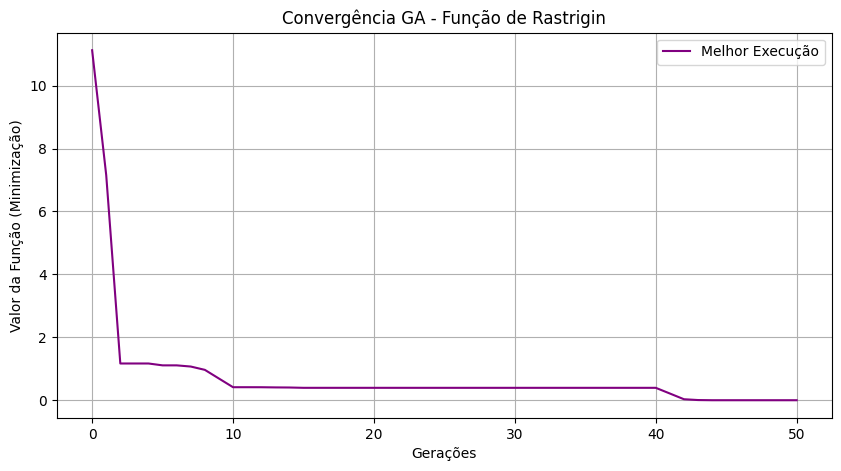

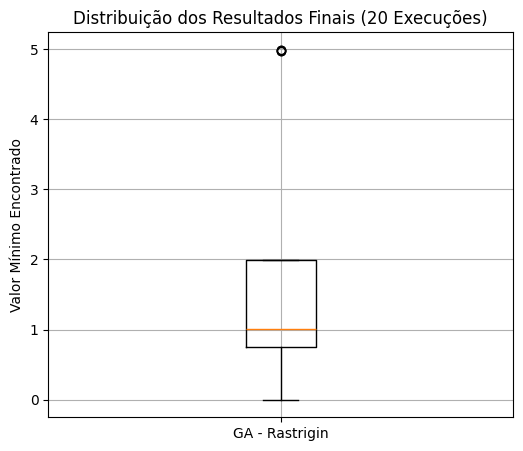

In [39]:
# Gráfico de Convergência da Melhor Execução
best_run_idx = np.argmin(rastrigin_results)
plt.figure(figsize=(10, 5))
plt.plot(rastrigin_histories[best_run_idx], label='Melhor Execução', color='purple')
plt.title('Convergência GA - Função de Rastrigin')
plt.xlabel('Gerações')
plt.ylabel('Valor da Função (Minimização)')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot dos Resultados Finais
plt.figure(figsize=(6, 5))
plt.boxplot(rastrigin_results)
plt.title('Distribuição dos Resultados Finais (20 Execuções)')
plt.ylabel('Valor Mínimo Encontrado')
plt.xticks([1], ['GA - Rastrigin'])
plt.grid(True)
plt.show()